# Data

In [18]:
with open("../data/shakespeare.txt", mode="r", encoding="utf-8") as f:
    text = f.read()

In [19]:
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [20]:
print(f"# chars: {len(text)}")

# chars: 1115394


In [21]:
vocab = sorted(list(set(text)))

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

"".join(vocab)

Vocab size: 65


"\n !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [22]:
char_to_int = {c: i for (i, c) in enumerate(vocab)}
int_to_char = {i: c for (i, c) in enumerate(vocab)}

encode = lambda chars: [char_to_int[c] for c in chars]
decode = lambda ints: "".join([int_to_char[i] for i in ints])

test_text = "hello world"
encoded_text = encode(test_text)
print(encoded_text)
print(decode(encoded_text))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [23]:
import torch

data = torch.tensor(encode(text), dtype=torch.int64)
print(data.shape)

data[:500]

torch.Size([1115394])


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [24]:
val_split = 0.1
n_val_samples = int(len(data) * val_split)

val_data = data[:n_val_samples]
train_data = data[n_val_samples:]

val_data.shape, train_data.shape

(torch.Size([111539]), torch.Size([1003855]))

In [25]:
block_size = 8
train_data[:block_size + 1]

tensor([43, 58,  6,  1, 25, 39, 56, 41, 47])

In [26]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

print(x, y)

for i in range(block_size):
    print(f"{x[:i+1], y[i]}")

tensor([43, 58,  6,  1, 25, 39, 56, 41]) tensor([58,  6,  1, 25, 39, 56, 41, 47])
(tensor([43]), tensor(58))
(tensor([43, 58]), tensor(6))
(tensor([43, 58,  6]), tensor(1))
(tensor([43, 58,  6,  1]), tensor(25))
(tensor([43, 58,  6,  1, 25]), tensor(39))
(tensor([43, 58,  6,  1, 25, 39]), tensor(56))
(tensor([43, 58,  6,  1, 25, 39, 56]), tensor(41))
(tensor([43, 58,  6,  1, 25, 39, 56, 41]), tensor(47))


In [27]:
batch_size = 4

def get_batch(data):
    inds = torch.randint(len(data) - block_size - 1, size=(batch_size,))
    x = torch.stack([data[i:i+block_size] for i in inds])
    y = torch.stack([data[i+1:i+block_size+1] for i in inds])
    return x, y

x, y = get_batch(train_data)

print(x.shape)
print(x)

print(y.shape)
print(y)

torch.Size([4, 8])
tensor([[ 0, 29, 33, 17, 17, 26,  1, 25],
        [ 1, 44, 43, 39, 56,  1, 53, 44],
        [40, 43,  1, 58, 46, 43,  1, 54],
        [ 1, 58, 46, 43,  1, 46, 43, 39]])
torch.Size([4, 8])
tensor([[29, 33, 17, 17, 26,  1, 25, 13],
        [44, 43, 39, 56,  1, 53, 44,  1],
        [43,  1, 58, 46, 43,  1, 54, 53],
        [58, 46, 43,  1, 46, 43, 39, 60]])


# Bigram model

In [28]:
import torch.nn as nn
from torch.nn import functional as F

class BigramModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, inputs, targets=None):
        # inputs and targets are (B, T).
        logits = self.token_embedding(inputs)  # (B, T, C).
        
        loss = None
        
        # Calc cross-entropy loss.
        if targets != None:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)

            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss
    
    def generate(self, tokens, n_tokens):
        for i in range(n_tokens):
            logits, _ = self(tokens)  # (B, T, C)
            logits = logits[:, -1, :]  # only use last pred col. (B, C)
            
            probs = F.softmax(logits, dim=-1)
            next_tokens = torch.multinomial(probs, num_samples=1)
            
            tokens = torch.cat((tokens, next_tokens), dim=-1)  # append. (B, T+1)
        
        return tokens

In [29]:
bigram_model = BigramModel(vocab_size)
logits, loss = bigram_model(x, y)
logits.shape, loss.shape

(torch.Size([32, 65]), torch.Size([]))

In [30]:
import math

print(loss)
print(math.log(65))  # -ln(e^x/sum(e^x)) -> -ln(1/65) -> ln(65)

tensor(4.7617, grad_fn=<NllLossBackward0>)
4.174387269895637


In [31]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=100)[0]

print(decode(tokens.tolist()))


'NfAqi:lNyKCo&F,wOPGhk:N jDxWqb'FU:pOaeUFzkHfsSWkIF,- TXCft,GND
pebJPC;Wq?&YxKvuwe!:3jqcC
ZZb;fVgeV&


In [32]:
optimizer = torch.optim.Adam(bigram_model.parameters(), lr=1e-3)

batch_size = 32

losses = []
for steps in range(10_000):
    xb, yb = get_batch(train_data)
    
    logits, loss = bigram_model(xb, targets=yb)
    losses.append(loss.item())
    
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
print(losses[-1])

2.3819429874420166


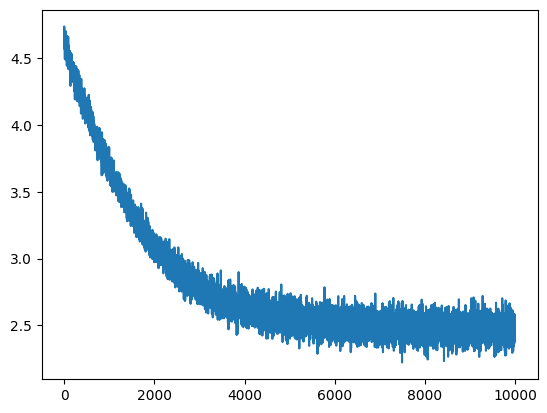

In [33]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [34]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=500)[0]

print(decode(tokens.tolist()))


Angelictiasy.

SERYowasthis they, et t in rth:
Whe me in
LII towhad thad s'theng u Me menourdicisibls side he atine we calesutaner by ker gngupis t ul,?
WICis be im hetharnane aftorret,
RIIAll;
Fr inouke ho, gellith douKI otofout
Angurssty hele nnth t, me weVONERGLugrd KEThe, E w thend whyopis,
M:
I THpoumame aty t
Wa owinjeQULA$$Ed'
Toupinthath bROf mepraist'rreporud tI ak ord hatho f bu stis sle m
LII:
JOPup-l hicau rurm,
Foly g ad r',
Ir our nten?
Yoth.'qce;

CAYRGordshathon hiferd ck hecher 
